In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC


In [108]:
iris  = datasets.load_iris()

In [109]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [110]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names, ordered=False)


In [111]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [112]:
df.shape

(150, 5)

In [113]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [114]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## EDA

In [115]:
output_values = df['species'].unique()
print(output_values)

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [116]:
species=df.groupby('species').count()

C:\Users\Cyber\AppData\Local\Temp\ipykernel_12364\1420655530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species=df.groupby('species').count()


In [117]:
def visual(x,y,hue,palette1,palette2,title1,title2):
    
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=x, y=y,hue=hue, palette=palette1)
    plt.title(title1)
    plt.tight_layout()
    plt.show()

    
    plt.figure(figsize=(6,5))
    sns.histplot(x=x, hue=hue, palette=palette2, multiple='stack')
    plt.title(title2)
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Data Distribution')

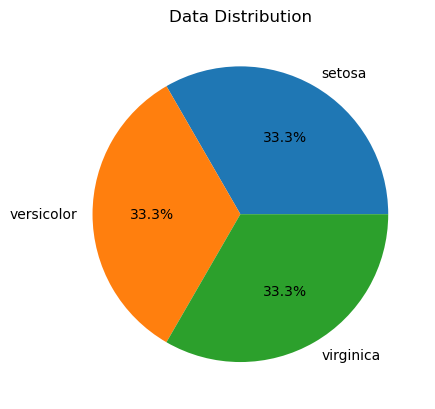

In [118]:
plt.pie(species['sepal length (cm)'],labels=species.index,autopct='%1.1f%%')
plt.title('Data Distribution')

In [119]:
df['id']=range(1, len(df) + 1)

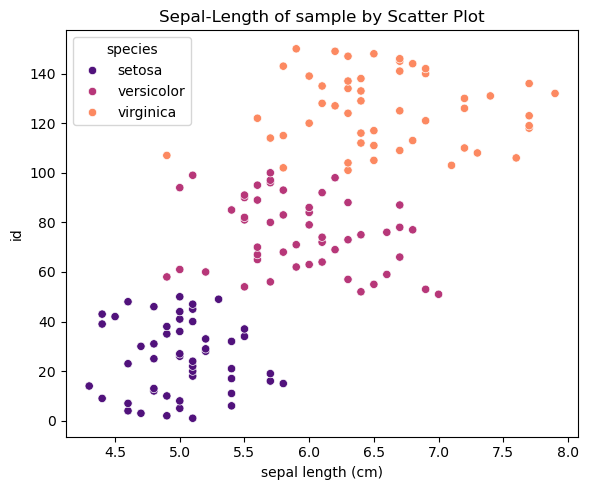

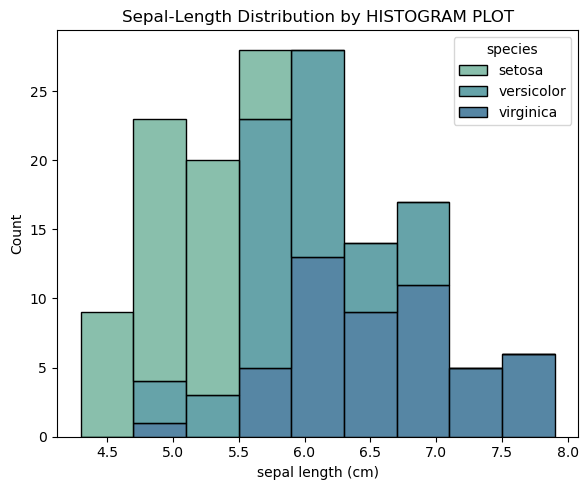

In [120]:
visual(df['sepal length (cm)'],df['id'],df['species'],'magma','crest','Sepal-Length of sample by Scatter Plot','Sepal-Length Distribution by HISTOGRAM PLOT')

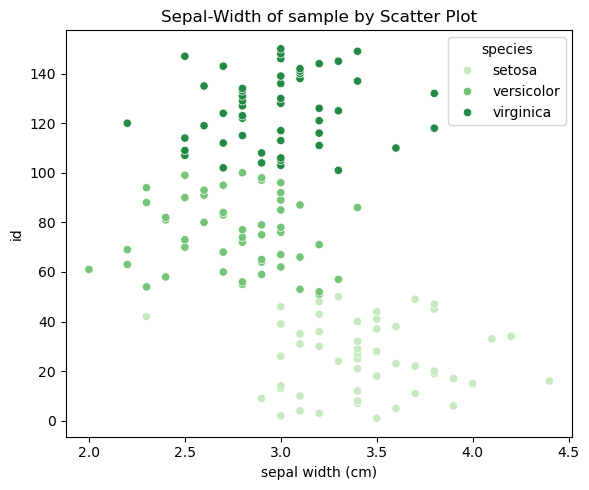

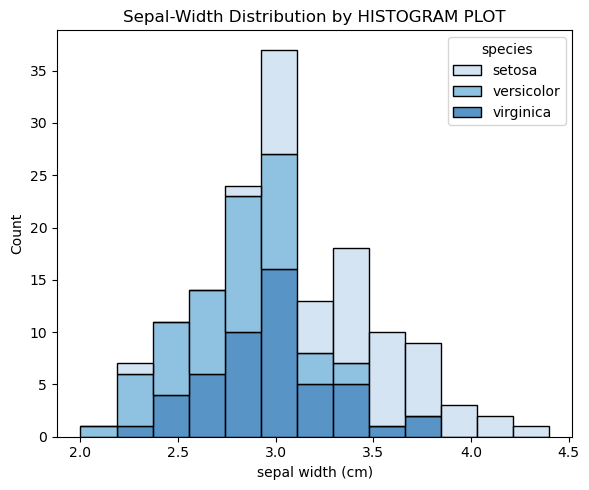

In [121]:
visual(df['sepal width (cm)'],df['id'],df['species'],'Greens','Blues','Sepal-Width of sample by Scatter Plot','Sepal-Width Distribution by HISTOGRAM PLOT')

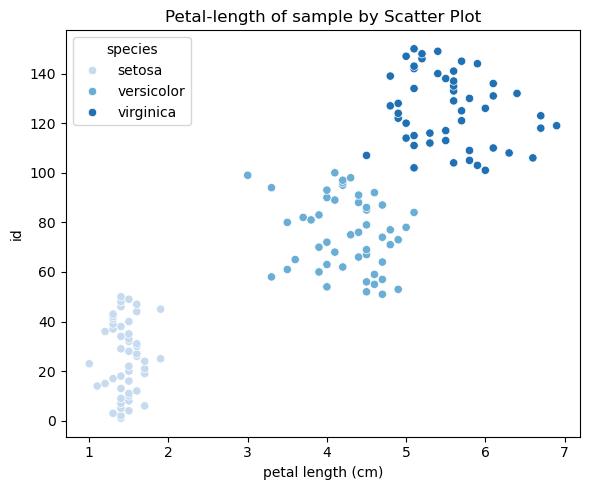

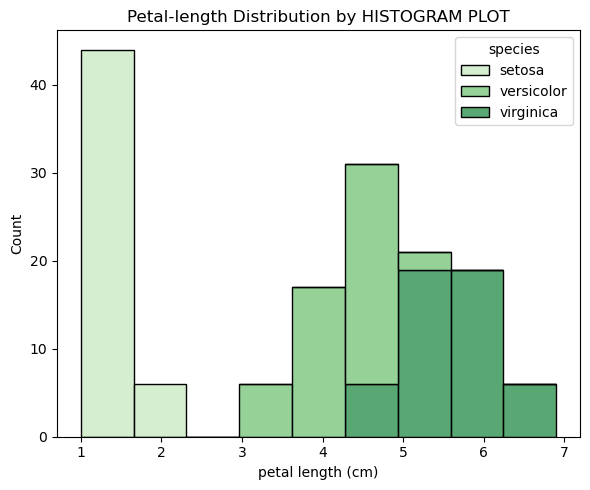

In [122]:
visual(df['petal length (cm)'],df['id'],df['species'],'Blues','Greens','Petal-length of sample by Scatter Plot','Petal-length Distribution by HISTOGRAM PLOT')

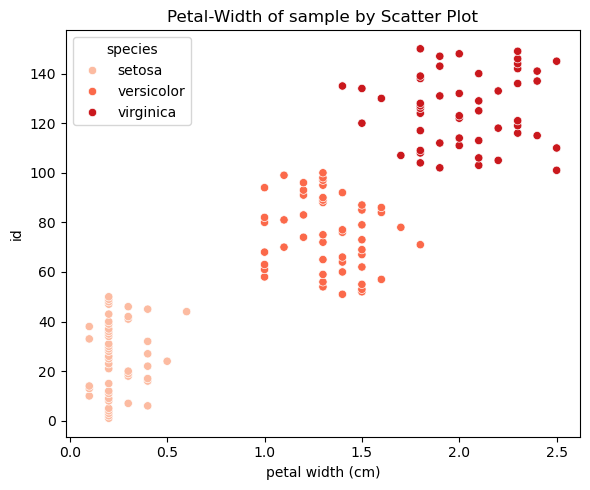

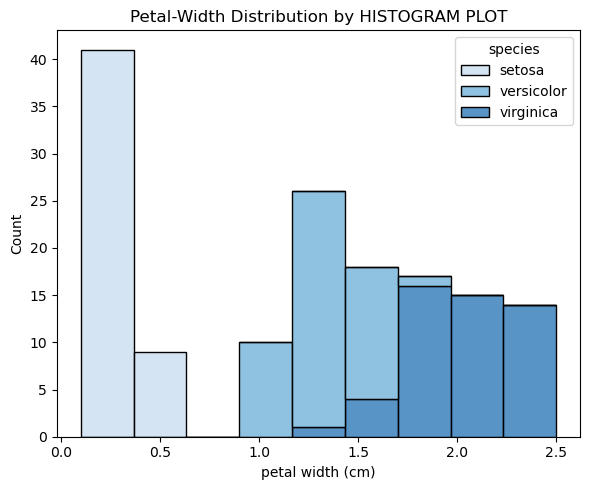

In [123]:
visual(df['petal width (cm)'],df['id'],df['species'],'Reds','Blues','Petal-Width of sample by Scatter Plot','Petal-Width Distribution by HISTOGRAM PLOT')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

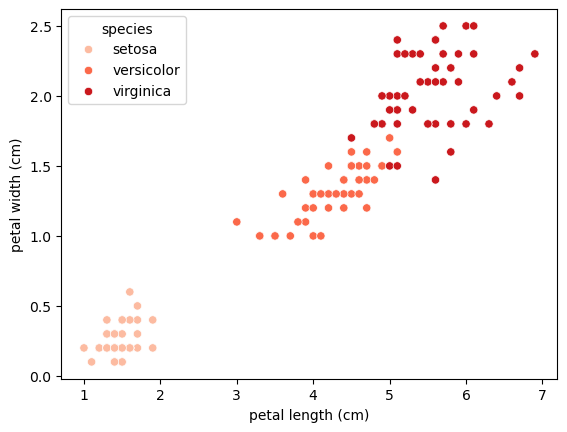

In [124]:
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'],hue=df['species'], palette='Reds')


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

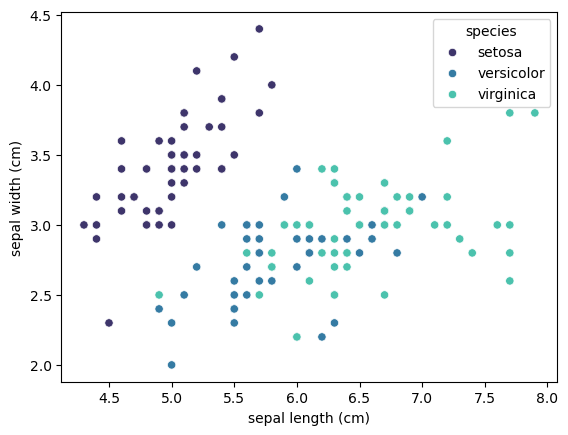

In [125]:
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'],hue=df['species'], palette='mako')


## Some Notes
we need to select the meaningful features and it's not important to scale the featurs also we want to encoding the output

In [126]:
for value in df['species']:
  if value == 'setosa':
    df['species'] = df['species'].replace(value, 0)
  elif value == 'versicolor':
    df['species'] = df['species'].replace(value, 1)
  elif value == 'virginica':
    df['species'] = df['species'].replace(value, 2)


C:\Users\Cyber\AppData\Local\Temp\ipykernel_12364\3856099879.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['species'] = df['species'].replace(value, 0)
C:\Users\Cyber\AppData\Local\Temp\ipykernel_12364\3856099879.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['species'] = df['species'].replace(value, 1)
C:\Users\Cyber\AppData\Local\Temp\ipykernel_12364\3856099879.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

In [127]:
df['species'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: species
Non-Null Count  Dtype   
--------------  -----   
150 non-null    category
dtypes: category(1)
memory usage: 414.0 bytes


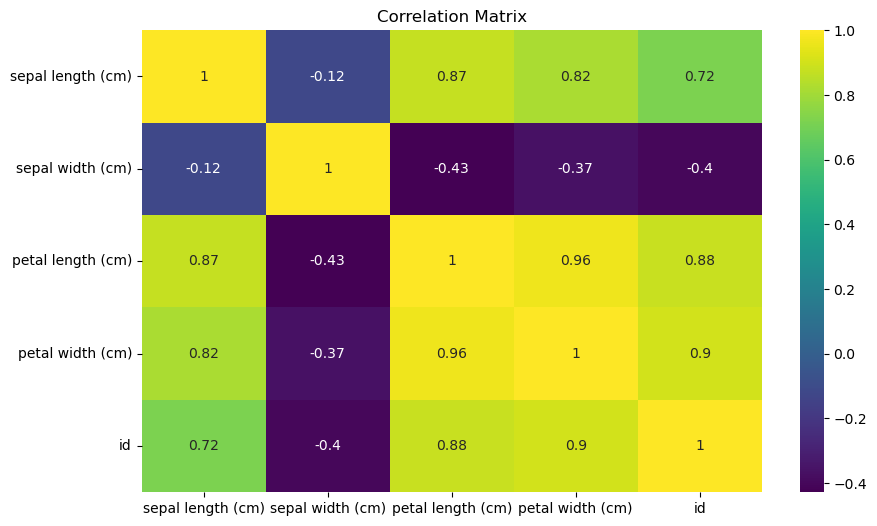

In [128]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include = ['number']).corr(), annot=True , cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [129]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'id'],
      dtype='object')

In [130]:
scaler = StandardScaler()
selected_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
X_scaled = scaler.fit_transform(df[selected_features])
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


we need to find the best learning rate also called l2 penalty and this is for the regularization

In [131]:
parameters_gird = {
    'alpha': [0.0001,0.001,.01],
    #'max_iter' : [200,300,500,1000,2000,3000]
    }
grid_search = GridSearchCV(MLPClassifier(), parameters_gird, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"\nBest Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Parameters: {'alpha': 0.0001}


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


after we calculated the best learning rate after that we need to compare the models relu and softmax

In [132]:
best_alpha = grid_search.best_params_['alpha']
#best_max_iter = grid_search.best_params_['max_iter']
models  = {
    "Deep (64-32-16 neurons, Relu)": MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', max_iter=3000, random_state=42, learning_rate_init=best_alpha),
    "Simple (10 neurons, ReLU)": MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=3000, random_state=42, learning_rate_init=best_alpha),
    "Simple (10 neurons, Sigmoid)": MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=3000, random_state=42, learning_rate_init=best_alpha),
    "Deep (64-32-16 neurons, Sigmoid)": MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='logistic', max_iter=3000, random_state=42, learning_rate_init=best_alpha),
}



Training model: Deep (64-32-16 neurons, Relu)
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Cross-validation scores (5-fold): [0.96666667 0.96666667 0.9        0.93333333 0.96666667]
Mean cross-validation accuracy: 0.9467


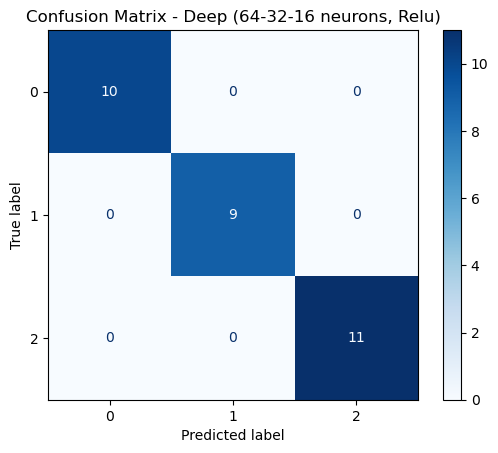

...............................................................................

Training model: Simple (10 neurons, ReLU)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores (5-fold): [0.83333333 0.93333333 0.86666667 0.93333333 0.96666667]
Mean cross-validation accuracy: 0.9067


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


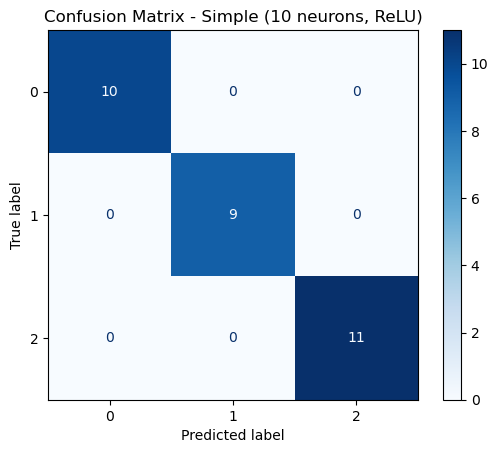

...............................................................................

Training model: Simple (10 neurons, Sigmoid)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores (5-fold): [0.76666667 0.9        0.76666667 0.9        1.        ]
Mean cross-validation accuracy: 0.8667


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


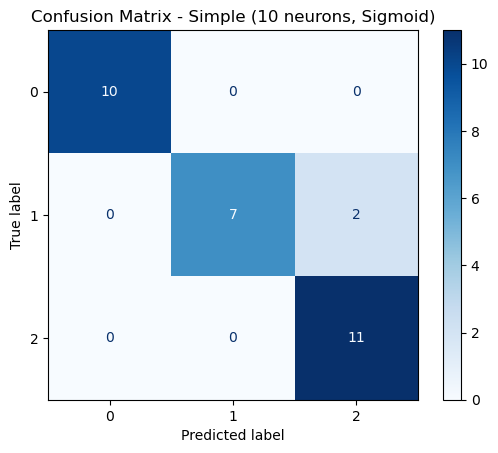

...............................................................................

Training model: Deep (64-32-16 neurons, Sigmoid)
Accuracy: 0.3333
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        10
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        11

    accuracy                           0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-validation scores (5-fold): [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
Mean cross-validation accuracy: 0.3333


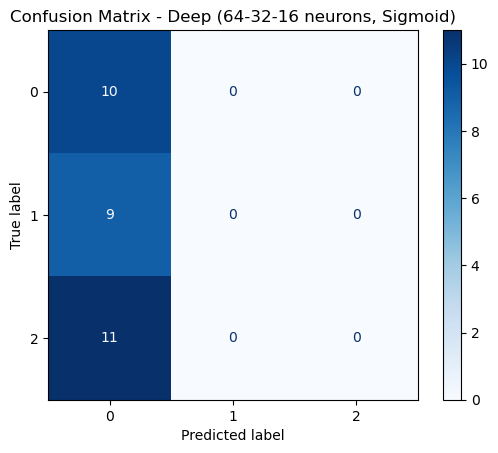

...............................................................................


In [133]:
results = {}

# Train models and compare accuracy
for name, model in models.items():
    print(f"\nTraining model: {name}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

     # Print evaluation
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Cross-validation (5-fold)
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores (5-fold): {cv_scores}")
    print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print("...............................................................................")

In [134]:
print(results)

{'Deep (64-32-16 neurons, Relu)': 1.0, 'Simple (10 neurons, ReLU)': 1.0, 'Simple (10 neurons, Sigmoid)': 0.9333333333333333, 'Deep (64-32-16 neurons, Sigmoid)': 0.3333333333333333}


C:\Users\Cyber\AppData\Local\Temp\ipykernel_12364\2091562306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


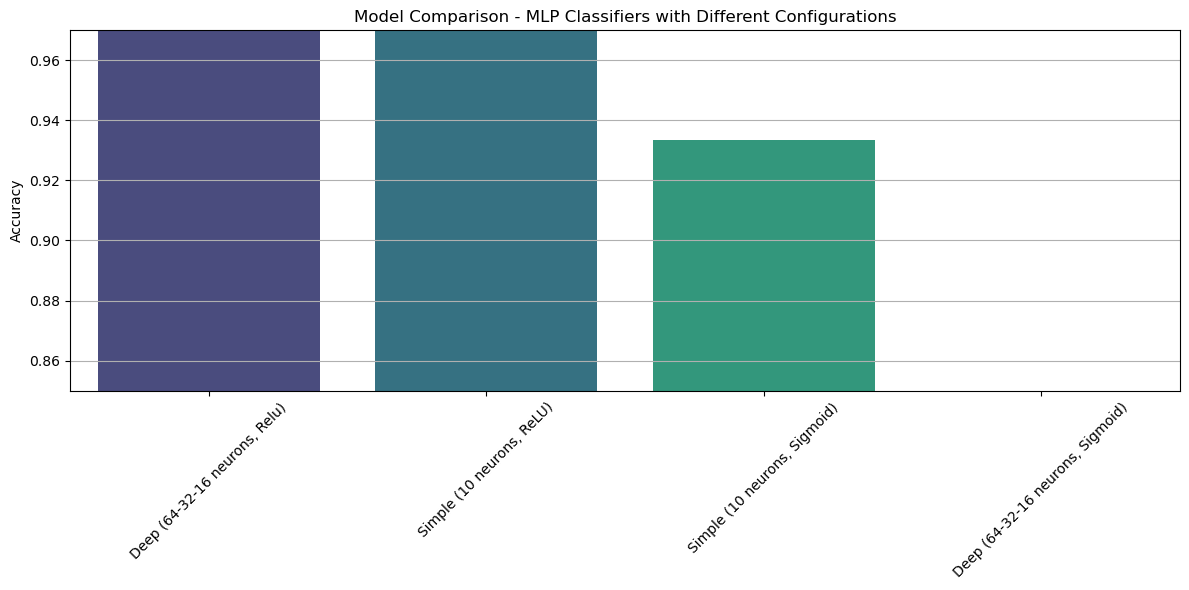

In [135]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.ylabel("Accuracy")
plt.title("Model Comparison - MLP Classifiers with Different Configurations")
plt.xticks(rotation=45)
plt.ylim(0.85, 0.97)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

apply SVM

In [136]:
x2 = df[selected_features]
y2 = df['species']
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)


In [137]:
model1 = SVC(kernel='linear')
model2 = SVC(kernel='poly')
model3 = SVC(kernel='rbf')  # You can change kernel to 'rbf', 'poly', etc.
model1.fit(X_train2, y_train2)
model2.fit(X_train2, y_train2)
model3.fit(X_train2, y_train2)




SVC()

In [138]:
y_pred1 = model1.predict(X_test2)
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test2)

In [139]:
print("Accuracy for linear:", accuracy_score(y_test2, y_pred1))
print("Classification Report:\n", classification_report(y_test2, y_pred1))
print("Accuracy for poly:", accuracy_score(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred1))
print("Accuracy for rbf:", accuracy_score(y_test2, y_pred3))
print("Classification Report:\n", classification_report(y_test2, y_pred1))

Accuracy for linear: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for poly: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy for rbf: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.

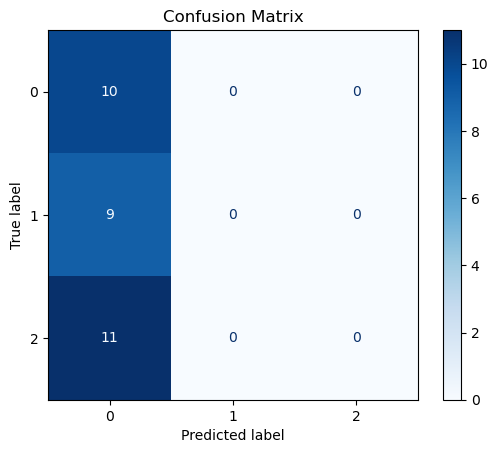

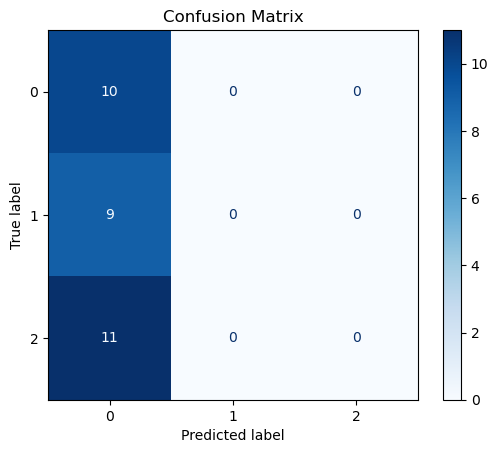

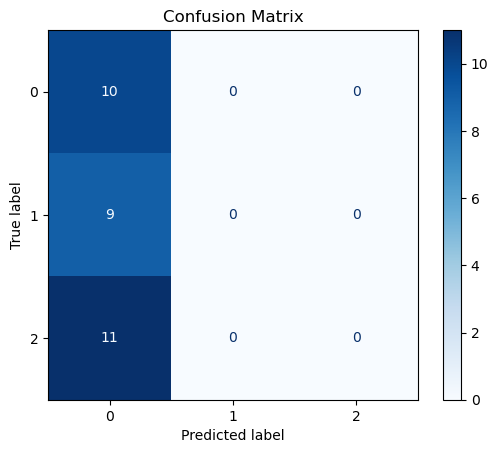

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def report_confusion_matrix(y_test, y_pred):
   
   cm = confusion_matrix(y_test, y_pred)
   disp.plot(cmap='Blues')
   plt.title("Confusion Matrix")
   plt.show()
report_confusion_matrix(y_test2,y_pred1)
report_confusion_matrix(y_test2,y_pred2)
report_confusion_matrix(y_test2,y_pred3)

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve

In [142]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


## SVM Scores

In [143]:
evaluate_model('SVM',y_test2,y_pred1)


SVM Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## NN Scores

In [144]:
evaluate_model('Neural Network',y_test,y_pred)


Neural Network Evaluation:
Accuracy: 0.3333333333333333
Precision: 0.1111111111111111
Recall: 0.3333333333333333
F1 Score: 0.16666666666666666
Confusion Matrix:
 [[10  0  0]
 [ 9  0  0]
 [11  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50        10
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        11

    accuracy                           0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packag